In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, matthews_corrcoef

df = pd.read_csv('/Users/lippd/Desktop/ML in R/Python/Text classification/data/cars.csv', sep=";")
df1 = pd.read_excel('/Users/lippd/Desktop/ML in R/Python/Text classification/data/products_allshops_dataset.xlsx')

In [2]:
labels = np.unique(df['marka_pop'])

In [3]:
np.random.seed(102)
df = df.reindex(np.random.permutation(df.index))

In [4]:
df

,marka,marka_pop
1306,BMW,BMW
8037,OPEL,OPEL
4155,FORD,FORD
1308,BMW,BMW
9097,PEUGEOT,PEUGEOT
...,...,...
4075,FORD,FORD
2882,CITROEN,CITROEN
2290,CHEVROLET,CHEVROLET
4851,HYUNDAI,HYUNDAI


In [8]:
# Dividing the data into the training, validation and testing group
df_test = df[0:1500].copy()
df_validation = df[1500:3000].copy()
df_training = df[3000:].copy()

In [19]:
# Create an instance of the CountVectorizer object
vectorizer = CountVectorizer()

In [22]:
vectorizer.fit(df_training['marka'])

CountVectorizer()

In [24]:
x_training = vectorizer.transform(df_training['marka'])

In [26]:
y_training = df_training['marka']

In [27]:
list_of_results = []

In [ ]:
for c in [0.1, 1, 2, 3]:
    for fit_intercept in [True, False]:
        for class_weight in [None, 'balanced']:
            for solver in ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]:
                for multi_class in ["ovr", "multinomial"]:
                    max_iter = 200
                    print("C={}, fit_intercept={}, class_weight={}, solver={}, multi_class={}".
                          format(c, fit_intercept, class_weight, solver, multi_class))
                    try:
                        clf = LogisticRegression(C=c, fit_intercept=fit_intercept, class_weight=class_weight,
                                                 solver=solver,
                                                 multi_class=multi_class, max_iter=max_iter)
                        # we fit the model to our training data (ie. we calculate the model parameters)
                        clf.fit(x_training, y_training)
                        # Convert the validation narratives to a feature matrix
                        x_validation = vectorizer.transform(df_validation['marka'])
                        # Generate predicted codes for our validation narratives
                        y_validation_pred = clf.predict(x_validation)
                        # Calculate how accurately these match the true codes
                        y_validation = df_validation['marka_pop']
                        val_accuracy = accuracy_score(y_validation, y_validation_pred)
                        # you can also check the accuracy on the training data
                        y_training_pred = clf.predict(x_training)
                        train_accuracy = accuracy_score(y_training, y_training_pred)
                        f1_score_micro = f1_score(y_validation, y_validation_pred, average='micro')
                        list_of_results.append(
                            [c, fit_intercept, class_weight, solver, multi_class, max_iter, val_accuracy,
                             train_accuracy, f1_score_micro])
                    except ValueError:
                        print("impossible to solve")

In [37]:
pd.DataFrame(list_of_results)

,0,1,2,3,4,5,6,7,8
0,0.1,True,None,newton-cg,ovr,200,0.964000,0.957648,0.964000
1,0.1,True,None,newton-cg,multinomial,200,0.965333,0.964042,0.965333
2,0.1,True,None,lbfgs,ovr,200,0.964000,0.957648,0.964000
3,0.1,True,None,lbfgs,multinomial,200,0.965333,0.964042,0.965333
4,0.1,True,None,liblinear,ovr,200,0.974667,0.972639,0.974667
...,...,...,...,...,...,...,...,...,...
139,3.0,False,balanced,liblinear,ovr,200,0.972000,0.994863,0.972000
140,3.0,False,balanced,sag,ovr,200,0.321333,0.327393,0.321333
141,3.0,False,balanced,sag,multinomial,200,0.596000,0.627529,0.596000
142,3.0,False,balanced,saga,ovr,200,0.725333,0.729217,0.725333


In [41]:
clf = LogisticRegression(C = 3,
                        fit_intercept= False,
                        class_weight= 'balanced',
                        solver = 'liblinear',
                        multi_class = 'ovr',
                        max_iter = 200)

In [43]:
clf.fit(x_training, y_training)

LogisticRegression(C=3, class_weight='balanced', fit_intercept=False,
                   max_iter=200, multi_class='ovr', solver='liblinear')

In [44]:
y_training_predicted = clf.predict(x_training)

In [47]:
y_training_predicted
accuracy_training = accuracy_score(y_training, y_training_predicted)
classification_report_training = classification_report(y_training, y_training_predicted)

G:\Program Files (x86)\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
x_validation = vectorizer.transform(df_validation['marka'])
y_validation_predicted = clf.predict(x_validation)
y_validation = df_validation['marka_pop']
accuracy_validation = accuracy_score(y_validation, y_validation_predicted)
classification_report_validation = classification_report(y_validation, y_validation_predicted)

G:\Program Files (x86)\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
x_test = vectorizer.transform(df_test['marka'])
y_test_predicted = clf.predict(x_test)
y_test = df_test['marka_pop']
accuracy_test = accuracy_score(y_test, y_test_predicted)
classification_report_test = classification_report(y_test, y_test_predicted)

G:\Program Files (x86)\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Program Files (x86)\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
cm_training = confusion_matrix(y_training, y_training_predicted)
cm_validation = confusion_matrix(y_validation, y_validation_predicted)
cm_test = confusion_matrix(y_test, y_test_predicted)

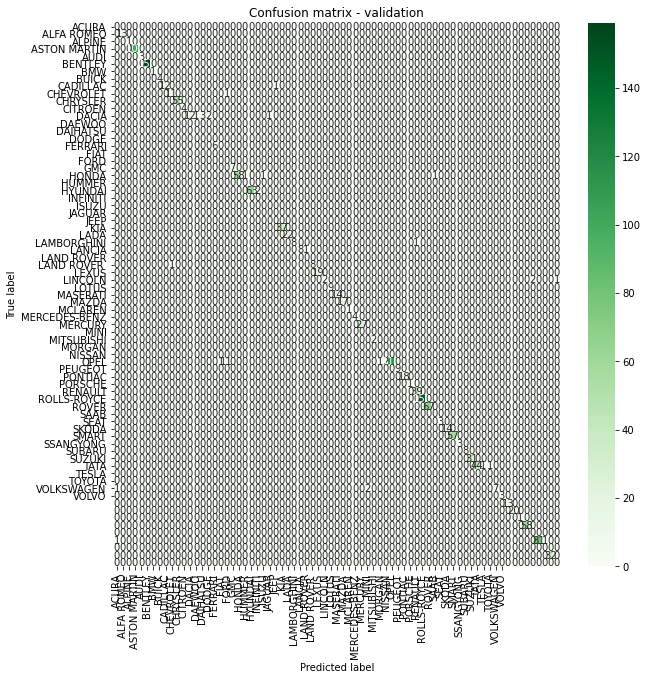

In [66]:
# Create the heatmap with confusion matrix (validation) using Seaborn library
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_validation, cmap='Greens', annot=True, fmt="d", ax=ax, xticklabels=labels, yticklabels=labels). \
    set_title("Confusion matrix - validation")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
df_test['Autocode'] = y_test_predicted
y_pred_prob = clf.predict_proba(x_test)
df_test['Probability'] = y_pred_prob.max(axis=1)
df_test.to_excel("lr_autocode.xlsx")

In [75]:
np.mean(df_test['Probability'])

0.517249538942669